# Introdução em analise de dados em python

### Apenas executando alguns códigos

In [1]:
print("Victor  Bertoldo")

Victor  Bertoldo


In [2]:
nome_do_filme = 'Totoro, o filme'

In [3]:
print(nome_do_filme)

Totoro, o filme


In [4]:
nome_do_filme

'Totoro, o filme'

## Importando a base de dados de filmes usando pandas

In [5]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv'
filmes = pd.read_csv(uri)

# filmes é um dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


** Caso queira ver a documentação referente ao tipo de objeto (variavel), basta colocar um '?' após a variável **

In [6]:
#filmes?

### Alterando o nome das colunas

In [7]:
filmes.columns = ['filmeId', 'filme', 'genero' ]

## Importando base de dados de avaliações

In [8]:
uri = 'https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true'

avaliacoes = pd.read_csv(uri)
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Para visualizar a Qtd de linhas e colunas do dataframe

In [9]:

avaliacoes.shape 

(100836, 4)

### Para visualizar apenas a qtd de linhas

In [10]:
len(avaliacoes)

100836

### Sobreescrevendo o nome das colunas

In [11]:
avaliacoes.columns

avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Fazendo consultas no dataframe
### Trazendo as avaliações apenas do filmeId igual à 1. Mostrando apenas os 10 primeiros

> Para trabalharmos com esta consulta, vamos armazenar estes dados em uma variável

In [12]:
avaliacoes_filmeId_1 = avaliacoes.query('filmeId==1')

avaliacoes_filmeId_1.head(n=10)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
1772,18,1,3.5,1455209816
2274,19,1,4.0,965705637
3219,21,1,3.5,1407618878
4059,27,1,3.0,962685262
4879,31,1,5.0,850466616


## O describe mostra algumas estatisticas do dataframe
### Mostrando as estatisticas do dataframe completo:

In [13]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### Visão (preview) de apenas uma coluna

In [14]:
avaliacoes['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

## Estatísticas apenas do filme de Id igual a 1

In [15]:
avaliacoes_filmeId_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


#### Definidndo o id do filme que queremos analisar

In [16]:
id = 1

#### Armazenando o nome do filme em uma variável

In [18]:
nome_do_filme = filmes.query("filmeId==@id")['filme']
nome_do_filme

0    Toy Story (1995)
Name: filme, dtype: object

## Trazendo métricas específicas de campo
#### Buscando apenas o nome do Filme

In [19]:
f1 = str(nome_do_filme).strip().split()[1:3]

f1 = f1[0] + ' ' + f1[1]
print(f1)


Toy Story


## Apresentando a Média das notas apenas do filme id igual à 1

In [20]:
mediaf1 = avaliacoes_filmeId_1['nota'].mean()

print("A média do Filme {}, é {:.2f}.".format(f1,mediaf1))

A média do Filme Toy Story, é 3.92.


# Cruzando os dados dos 2 dataframes para mostrar tabela com o nome do filme e a sua média de avaliações

** Agrupando dos dados da tabela de avaliações e trazendo a média por filme **

In [23]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#### Usando o join

> Se o numero de linhas  do dataframe 'avaliacoes' fosse examente igual ao numero de linhas da series 'notas_medias_por_filme' e os dois estivessem na mesma ordem, eu poderia apenas colar a series no dataframe da seguinte maneira:

  

```
filmes["nota_media"] = notas_medias_por_filme
filmes.head()
```

In [49]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

filmes_com_media.head()


,filmeId,filme,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#### Ordenando o dataframe por nota de forma decrescente

In [60]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,filme,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


# Iniciando visualização de dados
### Hipótese 1:
* Será que os filmes com média igual a nota máxima receberam o mesmo quantitativo de votos que os filmes com média entre 3 e 4? 
* Qual será a representatividade dos votos de acordo com o filme? 
* Um filme com média 5 pode ter recebido apenas 1 voto e em contrapartida um filme com média 4 pode ter recebido 100 votos, o que não significa que o filme com média 5 é "melhor" que outros filmes com média inferior.

  
> Para validar a hipótese serão analisados os filmes 1, 2 e 102084  

### Média dos filmes escolhidos:

In [72]:
filmes_com_media.query("filmeId in [1,2, 102084]")

,filmeId,filme,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.000000


#### Importando biblioteca para refinar as visualizações

In [77]:
import matplotlib.pyplot as plt

### Distribuição dos dados de voto do filme 1

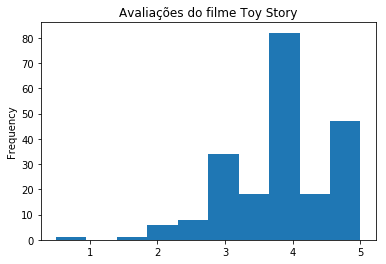

In [79]:
avaliacoes.query("filmeId==1")["nota"].plot(kind='hist', title='Avaliações do filme Toy Story')
plt.show()

> Neste filme houve uma quantidade considerável de votos com a nota máxima.

### Distribuição dos dados de voto do filme 2

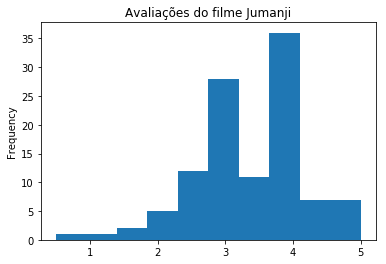

In [81]:
avaliacoes.query("filmeId==2")["nota"].plot(kind='hist', title='Avaliações do filme Jumanji')
plt.show()

> Este filme recebeu menos votos com notas máximas e mais votos entre 3 e 4.

### Distribuição dos dados de voto do filme 102084

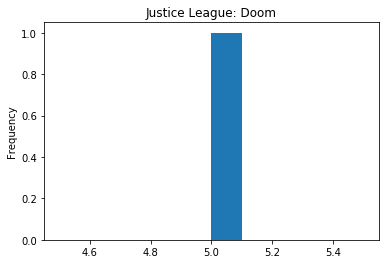

In [82]:
avaliacoes.query("filmeId==102084")["nota"].plot(kind='hist', title='Justice League: Doom')
plt.show()

> Este filme obteve nota máxima, porém de apenas 1 voto.

## Diante da amostra analisada acima, a hipótese se confirmou!
#### Avaliando a distribuição dos dados, fica claro que o filme com nota máxima não obteve um número de votos representativos o suficiente para determinar que os filmes melhores avaliados (nota máxima) não necessariamente são filmes melhores que filmes com média entre 3 e 4.

# Desafio 1:
Encontrar os filmes que não tiveram nenhuma avaliação

### Visualizando a coluna nota:

In [125]:
avaliacoes['nota'].head(10)

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

### Quantas linhas existem na coluna nota?

In [127]:
avaliacoes['nota'].count()

100836

### Transformando a coluna Nota em uma Series indexada pelo id do filme

In [123]:
series_nota = pd.Series(avaliacoes['nota'], index=avaliacoes['filmeId'])

3284

### Retornando o total de avaliações nulas

In [128]:
nulos = series_nota.isna().where(series_nota == True)
nulos.count()

3284

### Isso não quer dizer que este valor de nulos é total de filmes sem avaliações
** Para isso, vamos primeiro agrupar a qtd de notas por Filme **

In [150]:
notas_aggr_qtd = avaliacoes.groupby("filmeId")['nota'].count()
notas_aggr_qtd.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

### Dataset de filmes com a qtd de avaliações

In [156]:
filmes_com_qtd = filmes.join(notas_aggr_qtd, on="filmeId")
filmes_com_qtd.sort_values('nota', ascending=False).head(10)

,filmeId,filme,genero,nota
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
97,110,Braveheart (1995),Action|Drama|War,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0
461,527,Schindler's List (1993),Drama|War,220.0


### Buscar apenas filmes sem avaliações
> A ideia aqui é conseguir criar uma lista apenas com o index de filmes sem avaliações, após obter a lista de index, usá-la como parâmetro no loc para trazer do dataframe 'filmes_com_qtd' os filmes sem avaliações.

In [199]:
lista_nulos = pd.isnull(filmes_com_qtd)
indice = lista_nulos.query("nota==True").index
filmes_com_avaliacoes_nulas = filmes_com_qtd.loc[indice]
filmes_com_avaliacoes_nulas

,filmeId,filme,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [201]:
qtd_nulo = filmes_com_avaliacoes_nulas['filmeId'].count()
print("No total houveram {} filmes sem nenhuma avalição.".format(qtd_nulo))

No total houveram 18 filmes sem nenhuma avalição.


# Desafio 2:
Mudar o nome da coluna nota para média após o join.

In [47]:
filmes_com_media.rename(columns={'nota':'media_notas'}, inplace=True)
filmes_com_media.head()

,filmeId,filme,genero,media_notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3
Colocar o número de avaliações por filme, isto é, não só a media, mas o total de votos por filme

# Desafio 4
Arredondamento dos valores da coluna de notas_medias

# Desafio 5
Descobrir os generos únicos dos filmes

# Desafio 6
Contar o número de aparições de cada genero.

# Desafio 7
Plotar o grafico de aparições por genero. Grafico de barras.